## Medical insurance: a larger example

We've seen the fundamentals of building neural network regression models in TensorFlow.
Let's now build a model for a more feature rich dataset.

More specifically we're going to try to predict the cost of medical insurance in the US for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2025-11-04 15:22:03.407437: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-04 15:22:03.407506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-04 15:22:03.408313: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-04 15:22:03.414826: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have to turn the non-numerical columns into numbers.
To do so, we'll use the [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in pandas.
It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [4]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


Now we'll split data into features (`X`) and labels (`y`).

In [5]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


Now, we need to create training and test sets. We could do this manually, but to make it easier, we'll use the already available [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function available from Scikit-Learn.

In [7]:
# To do: Create training and test sets with train_test_split from sklearn with a 20% test set size. For reproducibility set random_state=42
from sklearn.model_selection import train_test_split
# Your code here:




**Solution**

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set random state for reproducible splits

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

Tensorflow cannot handle Pandas dataframes with heterogeneous data types that easily. We could use `tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))`. However, in this case we will create a numpy array with a homogeneous data type.

In [10]:
X_train.dtypes

age                   int64
bmi                 float64
children              int64
sex_female             bool
sex_male               bool
smoker_no              bool
smoker_yes             bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [11]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [12]:
X_train = X_train.to_numpy(dtype="float32")

In [13]:
X_train

array([[46.   , 19.95 ,  2.   , ...,  1.   ,  0.   ,  0.   ],
       [47.   , 24.32 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [52.   , 24.86 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [58.   , 25.175,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [37.   , 47.6  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [55.   , 29.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ]],
      dtype=float32)

In [14]:
y_train = y_train.to_numpy(dtype = "float32")

In [15]:
y_train

array([ 9193.839,  8534.672, 27117.994, ..., 11931.125, 46113.51 ,
       10214.636], dtype=float32)

In [16]:
X_test = X_test.to_numpy(dtype = "float32")
y_test = y_test.to_numpy(dtype = "float32")

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

2025-11-04 15:22:08.303536: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43604 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:41:00.0, compute capability: 8.6


Epoch 1/100
 1/34 [..............................] - ETA: 20s - loss: 13090.9512 - mae: 13090.9512

2025-11-04 15:22:09.138877: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd650341520 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-04 15:22:09.138920: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A40, Compute Capability 8.6
2025-11-04 15:22:09.153400: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1762266129.214429 1962202 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


34/34 [==============================] - 1s 2ms/step - loss: 8529.9473 - mae: 8529.9473
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7863.3413 - mae: 7863.3413
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7593.7783 - mae: 7593.7783
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7813.2036 - mae: 7813.2036
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7790.3921 - mae: 7790.3921
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7581.7910 - mae: 7581.7910
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7592.5312 - mae: 7592.5312
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7790.6074 - mae: 7790.6074
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7613.6162 - mae: 7613.6162
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7663.4971 - mae: 7663.4971
Epoch 11/10

In [18]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8751.6660 - mae: 8751.6660


[8751.666015625, 8751.666015625]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [19]:
# Your code here:









**Solution**

In [20]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

2025-11-04 15:22:14.451434: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


In [21]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4981.0083 - mae: 4981.0083


[4981.00830078125, 4981.00830078125]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

For many problems, the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) is a great starting choice. See Andrei Karpathy's "Adam is safe" point from [*A Recipe for Training Neural Networks*](http://karpathy.github.io/2019/04/25/recipe/) for more. 

Let visualize the loss curves of our model, we should see a downward trend.

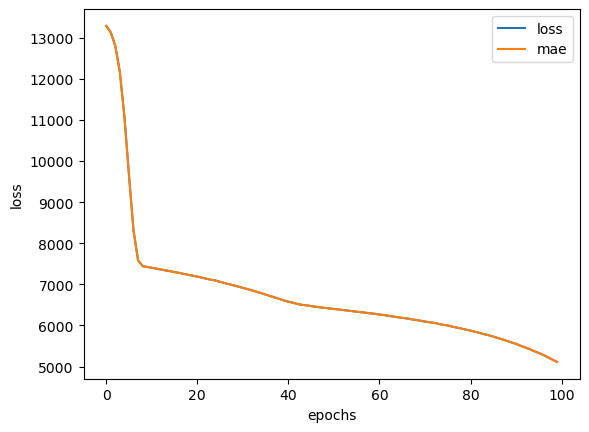

In [22]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).
What this tells us is the loss might go down if we try training it for longer.

How long should you train for? 
It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it is no longer imporving, thus preventing the model to overfit.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

In [23]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)

How did the extra training go?

In [24]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 1ms/step - loss: 3223.4307 - mae: 3223.4307


(3223.4306640625, 3223.4306640625)

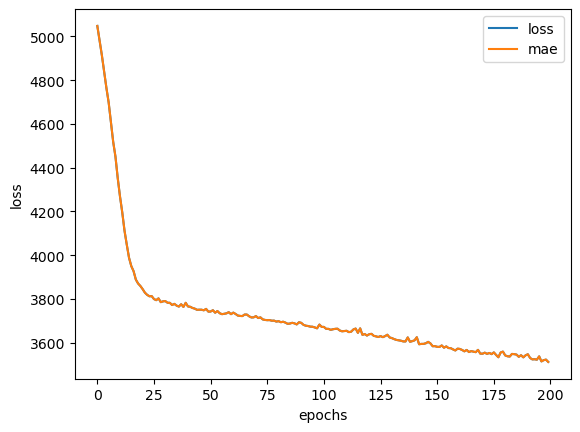

In [25]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

It seems the extra training time worked in our favour!

In [26]:
insurance_model_2.save('./insurance_model_2.keras')